In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [3]:
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")

In [4]:
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

# Describe the data

In [5]:
print(f"the data consists of {train.shape[0]} instances and {train.shape[1]} pixels")
print("--------------------------------------------------")
print(f"the data contains {train.isna().sum().sum()} missing values")
print("--------------------------------------------------")
print(f"the data contains {train.iloc[:, :].duplicated().sum()} duplicated instances")

the data consists of 60000 instances and 785 pixels
--------------------------------------------------
the data contains 0 missing values
--------------------------------------------------
the data contains 43 duplicated instances


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
train.iloc[:, 1:].describe()

pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.411467      0.805767      2.198283      5.682000     14.488767   
std        5.836188      8.215169     14.093378     23.819481     38.334549   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      230.000000    224.000000    255.000000    254.000000    255.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 784 columns]

In [8]:
train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [9]:
train.label.value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [10]:
print(f"fuplicates: {train.duplicated().sum()}")

df = pd.DataFrame()
df["label"] = train["label"]
df['duplicated'] = train.duplicated()

print("\nduplicate within classes:\n")
df.groupby("label").sum().reset_index()

fuplicates: 43

duplicate within classes:



label  duplicated
0      0           2
1      1           4
2      2          12
3      3           3
4      4           5
5      5           0
6      6          11
7      7           4
8      8           0
9      9           2

In [11]:
df.groupby("label").sum().to_dict()["duplicated"]

{0: 2, 1: 4, 2: 12, 3: 3, 4: 5, 5: 0, 6: 11, 7: 4, 8: 0, 9: 2}

In [12]:
[f"class: {x}: {y}" for x, y in df.groupby("label").sum().to_dict()["duplicated"].items()]

['class: 0: 2',
 'class: 1: 4',
 'class: 2: 12',
 'class: 3: 3',
 'class: 4: 5',
 'class: 5: 0',
 'class: 6: 11',
 'class: 7: 4',
 'class: 8: 0',
 'class: 9: 2']

So each instance consists of 784 features (pixels) where the image was originally 28 * 28 same as the original MNIST data

In [13]:
train["label"].nunique()

10

In [14]:
print(f"number of images in the data set {train.shape[0]}")

n_labels = train["label"].nunique()
print(f"number of classes in the data set {n_labels}")

# number of instances within each label
train["label"].value_counts().sort_index()

number of images in the data set 60000
number of classes in the data set 10


label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [15]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# Cleaning the DAta - Dropping Duplicates

In [16]:
train = train.drop_duplicates()

# Split the Data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(train.drop("label", axis = 1), train["label"], test_size=0.2 , random_state=42)

# Draw some of the images

In [18]:
sample = train.groupby("label").head(1).sort_values("label")

In [19]:
import matplotlib.pyplot as plt

def visualize_data(data, label, normalize, cmap = plt.cm.gray, has_label = True):

    if normalize:
        print("normalized")
        data = data / 255

    images_and_labels = list(zip(data,  label))
    for index, (image, label) in enumerate(images_and_labels[:10]):
        plt.subplot(2, 5, index + 1)
        plt.imshow(image.reshape(28, 28).squeeze(), cmap=cmap)
        if has_label:
          plt.title(f'label: {label}' )
        else:
          plt.title(f'{label}' )
        plt.axis('off')

normalized


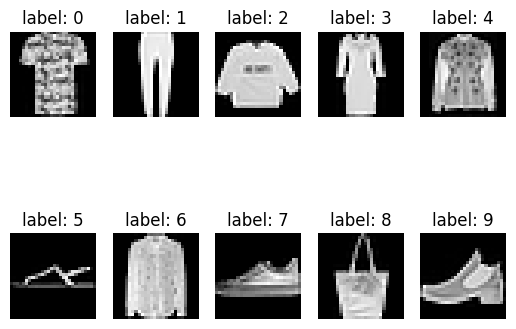

In [20]:
visualize_data(sample.iloc[:, 1:].values, sample["label"].values, True)

# Visualize the Data

To visualize the data I will use PCA and check the amount of explained variance for the images and I will check if I can use low number of principle compoenents to classify the images later.

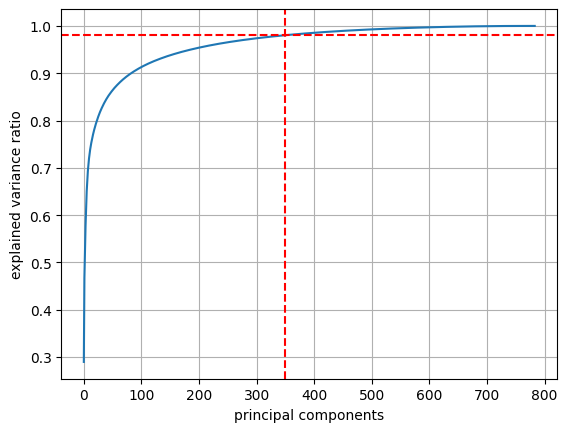

In [21]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

data_scaled = x_train_scaled

pca = PCA()
pca.fit(data_scaled)
cummulative = np.cumsum(pca.explained_variance_ratio_)


plt.plot(cummulative)
plt.grid()
plt.xlabel("principal components")
plt.ylabel("explained variance ratio")
plt.axhline(y=0.98, color='r', linestyle='--', label = "")
plt.axvline(x=350, color='r', linestyle='--', label = "")

In [22]:
pca = PCA(400)
data_red = pca.fit_transform(data_scaled)


first_component = data_red[:, 0]
second_component = data_red[:, 1]
third_component = data_red[:, 2]

markers = dict( size=4, color=y_train)
scatter = go.Scatter3d(x= first_component,
                       y= second_component,
                       z= third_component,
                       mode='markers',
                       marker= markers)
fig = go.Figure(data=[scatter])

# center the layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

It looks that different classes are condensed together at different spots, this means that the simillar images within the same class are groupped even with just 3 principal components, it might not be ideal but it shows that we can go ahead and plot the explained variance ratio to check the right amount of principal components needed for dimensionality reduction.

In [23]:
data_reduced = data_red[:, :484]

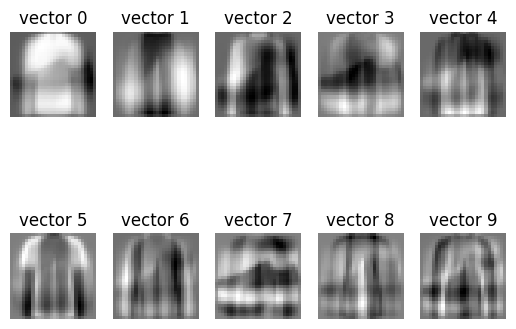

In [24]:
import matplotlib.pyplot as plt

pca_red = pca.components_.reshape((len(pca.components_), 28, 28))
visualize_data(pca_red[:10], [f"vector {str(i)}" for i in range(11)], False, "gray", has_label = False)

In [25]:
x_train_comp = pca.transform(x_train_scaled)
train_data_pca = pca.inverse_transform(x_train_comp)

x_test_comp = pca.transform(x_test_scaled)
test_data_pca = pca.inverse_transform(x_test_comp)

Now using those eigen vectors we can transform the fashion dataset using just 350 components, the images can lose some of it resolution (information) because we just used much less components.

From the above we can see there are 10 different classes, from 0 to 9 and they are nearly equally represented.

Now to be able to use it the data in convolutional neural networks we can reshape the images to be 28 * 28 and we have n instances which is the number of rows in the dataset.

In [26]:
sample.iloc[:,:-1]

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
3       0       0       0       0       1       2       0       0       0   
29      1       0       0       0       0       0       0       0       0   
0       2       0       0       0       0       0       0       0       0   
4       3       0       0       0       0       0       0       0       0   
5       4       0       0       0       5       4       5       5       3   
7       5       0       0       0       0       0       0       0       0   
2       6       0       0       0       0       0       0       0       5   
21      7       0       0       0       0       0       0       0       0   
9       8       0       0       0       0       0       0       0       0   
1       9       0       0       0       0       0       0       0       0   

    pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
3        0  ...        39         3         0         0         0         0   
29       0  ...        32         0         1         0         0         0   
0        0  ...         0         0         0         0         0         0   
4        0  ...        63         0         0         0         0         0   
5        5  ...         5         7         8         7         4         3   
7        0  ...         0         0         0         0         0         0   
2        0  ...        79         0         0         0        30        43   
21       0  ...         0         0         0         0         0         0   
9        0  ...       198       203       214       166         0         0   
1        0  ...         0         0         0         0         0         0   

    pixel780  pixel781  pixel782  pixel783  
3          1         0         0         0  
29         0         0         0         0  
0          0         0         0         0  
4          0         0         0         0  
5          7         5         0         0  
7          0         0         0         0  
2          0         0         0         0  
21         0         0         0         0  
9          0         0         0         0  
1          0         0         0         0  

[10 rows x 784 columns]

normalized


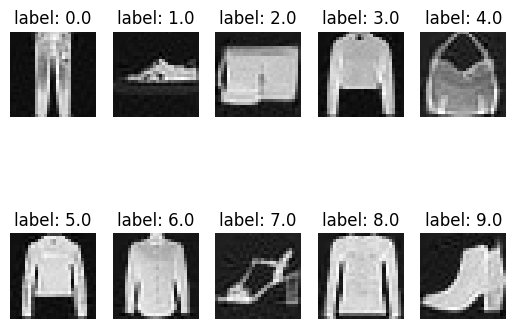

In [27]:
sample_df = pd.DataFrame(train_data_pca, columns = x_train.columns)
sample_df["label"] = y_train

sample = sample_df.groupby("label").head(1).sort_values("label")
visualize_data(sample.iloc[:,:-1].values, sample["label"].values, True)

As you can see above with only 350 eigen vectors we could reconstruct the images with great details.

In [28]:
x_train_comp.shape

(47965, 400)

In [29]:
# I am using the convention of channels last, this is the tensorflow convention.
x_train = x_train.values.reshape(x_train.shape[0], 28, 28 , 1)
x_test = x_test.values.reshape(x_test.shape[0], 28, 28 , 1)

x_train_comp = x_train_comp.reshape(x_train_comp.shape[0], 20, 20 , 1)
x_test_comp = x_test_comp.reshape(x_test_comp.shape[0], 20, 20 , 1)

In [28]:
!pip install --upgrade pip
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.9 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


# Encode the Label

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_train_encoded = ohe.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_encoded = ohe.transform(y_test.values.reshape(-1, 1)).todense()

# Part 2 - Modeling

Here we wil first start with a simple convnet which is the very famous LeNet-5 network, many books discussed it with slight variations as shown:
Hands on Machine Learning with sklearn and tensorflow 2nd edition:

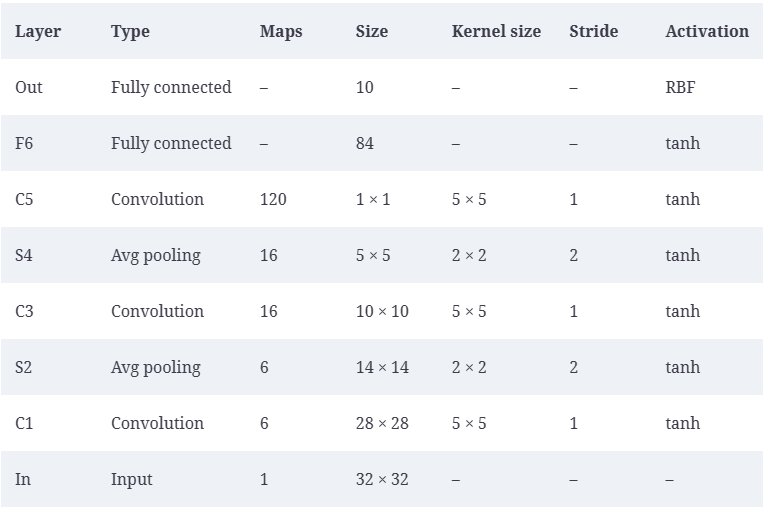

And Dive into Deep Learning chapter 7 section 6

https://d2l.ai/chapter_convolutional-neural-networks/lenet.html
Which I used as a refrence to implement my layers and instead of the RBF I used softmax as in the dive into deep learning book but relaced softmaxes with tanh to follow the original network.

In [31]:
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import pandas as pd
import tensorflow as tf

2024-04-12 17:36:54.147669: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 17:36:54.147794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 17:36:54.418755: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [32]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0', '/device:GPU:1']


In [33]:
from keras.layers import Dropout, Conv2D, AvgPool2D, Flatten, Dense, MaxPool2D, Lambda
from keras import Input
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def lenet_5(shape):
    model = tf.keras.Sequential([

      Input(shape=(shape,shape, 1)),

      Conv2D(6, 5, activation='tanh', padding = "same"),
      AvgPool2D(pool_size=2, strides=2),
      Conv2D(16, 5, activation='tanh'),
      AvgPool2D(pool_size=2, strides=2),

      Flatten(),
      Dense(120, activation='tanh'),
      Dense(84, activation='tanh'),
      Dense(10, activation='softmax')
    ])
    
    return model


def fit_lenet(data, label, callbacks, batch_size, shape, verbose = 1):
        
    model = lenet_5(shape)
    model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
    datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

    with tf.device('/device:GPU:0'):
        datagen.fit(data)

        train_generator = datagen.flow(data, label, batch_size= batch_size, subset='training')
        validation_generator = datagen.flow(data, label, batch_size = batch_size, subset='validation')

        history = model.fit(train_generator,
                          epochs=100,
                          validation_data=validation_generator, callbacks = [callbacks],
                          verbose = verbose)
    
    return history, model

def lenet_modified(shape):
    model = tf.keras.Sequential([

      Input(shape=(shape,shape, 1)),

      Conv2D(60, 5, activation='relu', padding = "same"),
      AvgPool2D(pool_size=2, strides=2),
      Conv2D(256, 5, activation='relu', padding = "same"),
      AvgPool2D(pool_size=2, strides=2),
      Conv2D(256, 5, activation='relu', padding = "same"),
      Conv2D(256, 5, activation='relu', padding = "same"),
      AvgPool2D(pool_size=2, strides=2),
    
      Flatten(),
      Dense(120, activation='relu'),
      Dense(84, activation='relu'),
      Dense(10, activation='softmax')
    ])
    
    return model


def fit_lenet_new(data, label, callbacks, batch_size, shape, verbose = 1):
        
    model = lenet_modified(shape)
    model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
    datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

    with tf.device('/device:GPU:0'):
        datagen.fit(data)

        train_generator = datagen.flow(data, label, batch_size= batch_size, subset='training')
        validation_generator = datagen.flow(data, label, batch_size = batch_size, subset='validation')

        history = model.fit(train_generator,
                          epochs=100,
                          validation_data=validation_generator, callbacks = [callbacks],
                          verbose = verbose)
    
    return history, model


def alexnet(shape):
    model = tf.keras.Sequential([

        Input(shape=(shape,shape, 1)),
        Lambda(lambda image: tf.image.resize(image, (200, 200))),
        Conv2D(96, 5, 4, activation='relu'),
        MaxPool2D(pool_size=3, strides=2),
        Conv2D(256, 5, activation='relu', padding = 'same'),
        MaxPool2D(pool_size=3, strides=2),
        Conv2D(384, 3, padding = 'same', activation='relu'),
        Conv2D(384, 3, padding = 'same', activation='relu'),
        Conv2D(256, 3, padding = 'same', activation='relu'),
        Flatten(),
        
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    return model


def fit_alexnet(data, label, callbacks, batch_size, shape, verbose = 1):
        
    model = alexnet(shape)
    model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
    datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

    with tf.device('/device:GPU:0'):
        datagen.fit(data)

        train_generator = datagen.flow(data, label, batch_size= batch_size, subset='training')
        validation_generator = datagen.flow(data, label, batch_size = batch_size, subset='validation')

        history = model.fit(train_generator,
                          epochs=100,
                          validation_data=validation_generator, callbacks = [callbacks],
                          verbose = verbose)
    
    return history, model

def mlp():
    """making a simple mlp model"""
    
    model = Sequential()
    model.add(Input(shape=(784,)))
    model.add(Dense(5000, activation="relu"))
    model.add(Dense(2000, activation="relu"))
    model.add(Dense(1000, activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(225, activation="relu"))
    model.add(Dense(124, activation="relu"))
    
    model.add(Dense(10, activation="softmax"))
    
    return model

def fit_mlp(data, label, callbacks, batch_size, verbose = 1):
        
    model = mlp()
    model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

    with tf.device('/device:GPU:0'):
        history = model.fit(data,
                            label,
                            epochs=100,
                            batch_size=batch_size,
                            validation_split=0.3,
                            verbose = verbose,
                            callbacks=[callbacks])
    return history, model

In [34]:
from tqdm import tqdm

def eval_model(model, x_test, y_test, x_train, y_train):
    """evaluate the model on the test dataset
    Args:
        model: the model to be evaluated
        x_test: the test dataset
        y_test: the test labels
    Returns:
        Accuracy and loss on test set"""
    loss, accuracy = model.evaluate(x_test, y_test, batch_size=10, verbose = 0)
    loss_train, accuracy_train = model.evaluate(x_train, y_train, batch_size=10, verbose = 0)
    return loss, accuracy, loss_train, accuracy_train

def k_folds_evaluation(data, label, batch_size, shape, n_folds, model):
    
    accuracies = []; losses = []; histories = []
    folds = KFold(n_splits=n_folds, random_state=42, shuffle=True)
    splits = list(folds.split(data))
    for i in tqdm(range(len(splits))):
        
        idx_train, idx_test = list(splits)[i]
        
        train = data[idx_train]
        test = data[idx_test]
        
        y_train = label[idx_train]
        y_test = label[idx_test]
        
        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2)]
        
        if model == "lenet":
            (history,
             model) = fit_lenet(train, y_train, callbacks, batch_size, shape, verbose = 0)
        elif model == "alexnet":
            (history,
             model) = fit_alexnet(train, y_train, callbacks, batch_size, shape, verbose = 0)
        
        (test_loss,
         test_accuracy,
         loss_train,
         accuracy_train) = eval_model(model, test, y_test, train, y_train)
        accuracies.append(test_accuracy)
        losses.append(test_loss)
        histories.append(history)
    
    return accuracies, losses, histories

In [35]:
def model_metrics(model, x_test, x_train):
    test_loss, test_accuracy, loss_train, accuracy_train = eval_model(model, x_test, np.array(y_test_encoded), x_train, np.array(y_train_encoded))

    print(f"test loss: {test_loss}, test accuracy: {test_accuracy}")
    print(f"training loss: {loss_train}, training accuracy: {accuracy_train}")

    preds = model.predict(x_test, verbose = 0)
    preds = ohe.inverse_transform(preds)
    y_trial = ohe.inverse_transform(np.array(y_test_encoded))
    conf = confusion_matrix(y_trial, preds)
    disp = ConfusionMatrixDisplay(conf)
    disp.plot()

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
def show_learning_curves(history):
    
    f = plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)

    # plot accuracy and validation accuracy
    plt.plot(history.history.get("accuracy"), label = f"train_accuracy")
    plt.plot(history.history.get("val_accuracy"), label = f"validation_accuracy")

    plt.title('accuracy curves plot'), plt.ylabel('accuracy'), plt.xlabel('epoch')
    plt.legend()

    plt.subplot(1, 2, 2)

    # plot loss and validation loss
    plt.plot(history.history.get("loss"), label = f"train_loss")
    plt.plot(history.history.get("val_loss"), label = f"validation_loss")

    plt.title('loss curves plot'), plt.ylabel('loss'), plt.xlabel('epoch')
    plt.legend()

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

I0000 00:00:1712936275.234293      99 service.cc:145] XLA service 0x7824f0010620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712936275.234386      99 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1712936275.234395      99 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 34/640 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4059 - loss: 1.7843

I0000 00:00:1712936278.566082      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7078 - loss: 0.8200 - val_accuracy: 0.8234 - val_loss: 0.4686
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8386 - loss: 0.4439 - val_accuracy: 0.8546 - val_loss: 0.4073
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8602 - loss: 0.3868 - val_accuracy: 0.8671 - val_loss: 0.3777
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8711 - loss: 0.3515 - val_accuracy: 0.8708 - val_loss: 0.3543
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8809 - loss: 0.3230 - val_accuracy: 0.8823 - val_loss: 0.3395
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8890 - loss: 0.2964 - val_accuracy: 0.8823 - val_loss: 0.3246
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8983 - loss: 0.2769 - val_accuracy: 0.8830 - val_loss: 0.3272
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9003 - loss: 0.2717 - val_accuracy: 0.8845

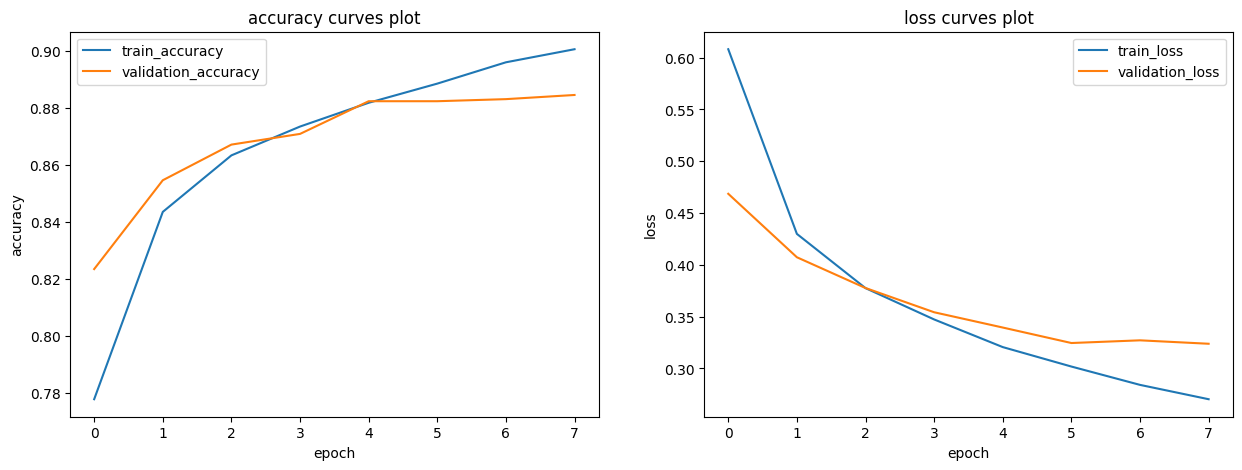

In [37]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2)]
history, model = fit_lenet(x_train, np.array(y_train_encoded), callbacks, batch_size = 60, shape = 28)

show_learning_curves(history)

test loss: 0.31107252836227417, test accuracy: 0.8858333230018616
training loss: 0.26165762543678284, training accuracy: 0.9052916765213013


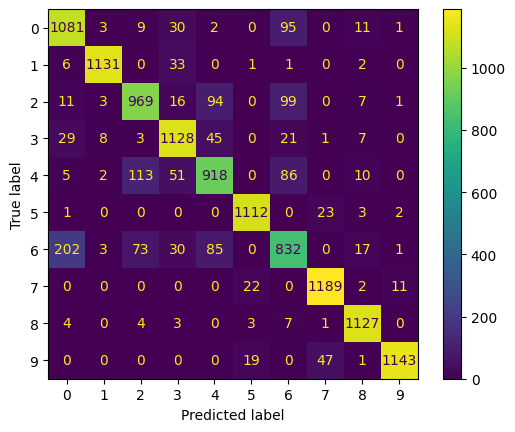

In [38]:
model_metrics(model, x_test/255, x_train/255)

So the results are not very bad but there is clear underfitting as the validation accuracy is below 90, having verfitting suggests that reducing the data dimensionality will not help but I will try it next to see if the underfitting increases or remains the same but it shouldn't improve.

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2214 - loss: 2.0293 - val_accuracy: 0.4769 - val_loss: 1.4142
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4930 - loss: 1.3861 - val_accuracy: 0.5330 - val_loss: 1.3043
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5429 - loss: 1.2578 - val_accuracy: 0.5946 - val_loss: 1.1522
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6066 - loss: 1.0950 - val_accuracy: 0.6573 - val_loss: 0.9403
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6631 - loss: 0.9165 - val_accuracy: 0.6806 - val_loss: 0.8322
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6904 - loss: 0.8110 - val_accuracy: 0.7058 - val_loss: 0.7576
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7090 - loss: 0.7565 - val_accuracy: 0.7165 - val_loss: 0.7177
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7237 - loss: 0.7151 - val_accuracy: 0.7444

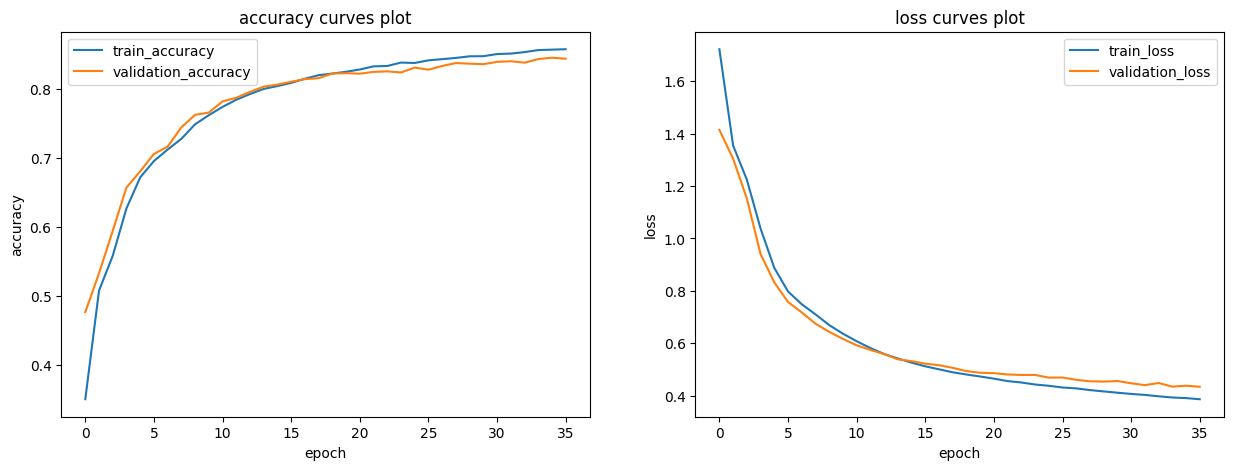

In [39]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2)]

# The shape of the image is nw more compressed, only 20 * 20 instead of 28 * 28
history, model = fit_lenet(x_train_comp, np.array(y_train_encoded), callbacks, batch_size = 60, shape = 20)

show_learning_curves(history)

test loss: 0.42105624079704285, test accuracy: 0.8475000262260437
training loss: 0.3873709738254547, training accuracy: 0.8588125109672546


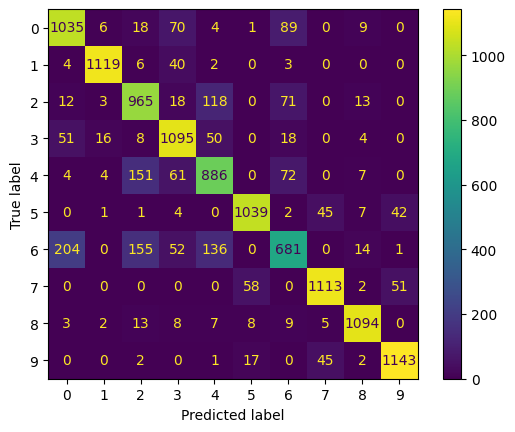

In [40]:
model_metrics(model, x_test_comp/255, x_train_comp/255)

The model is underfitting more as expected but not with a huge differene, Now I will try the k_folds cross validation on the the 5 folds.

  0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

100%|██████████| 5/5 [01:14<00:00, 14.92s/it]


mean accuracy on test set: 0.793625009059906
mean loss on test set: 0.5623225092887878


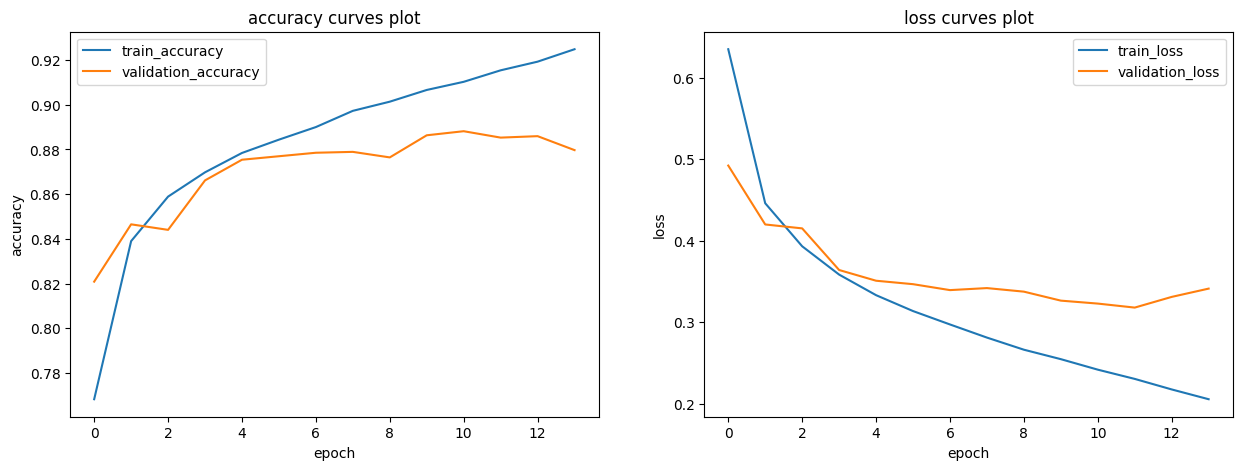

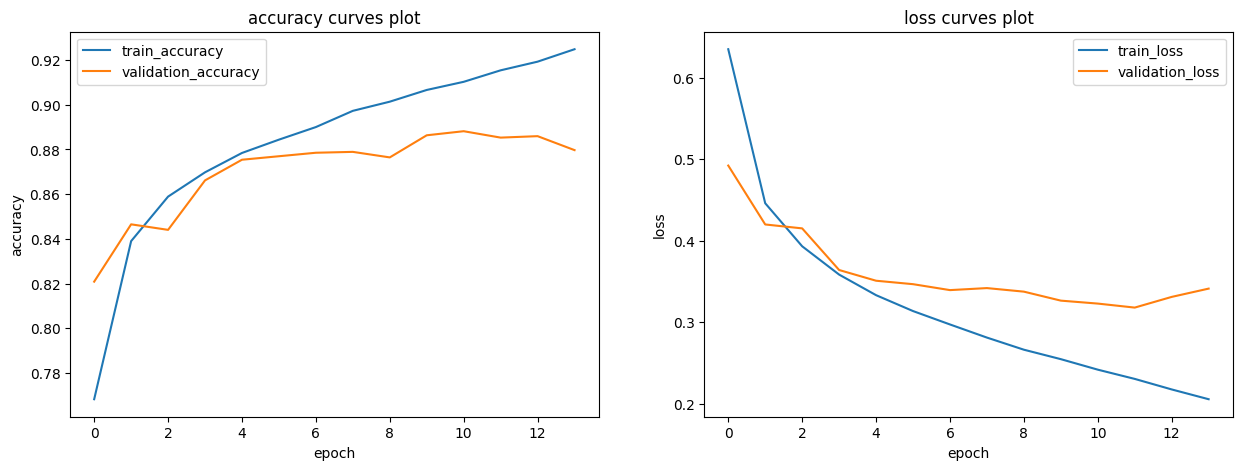

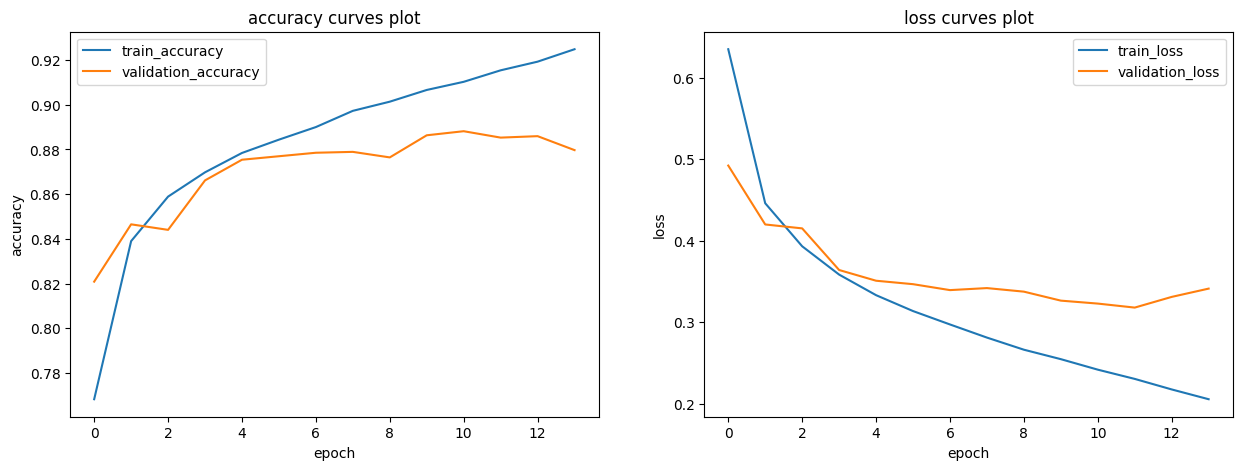

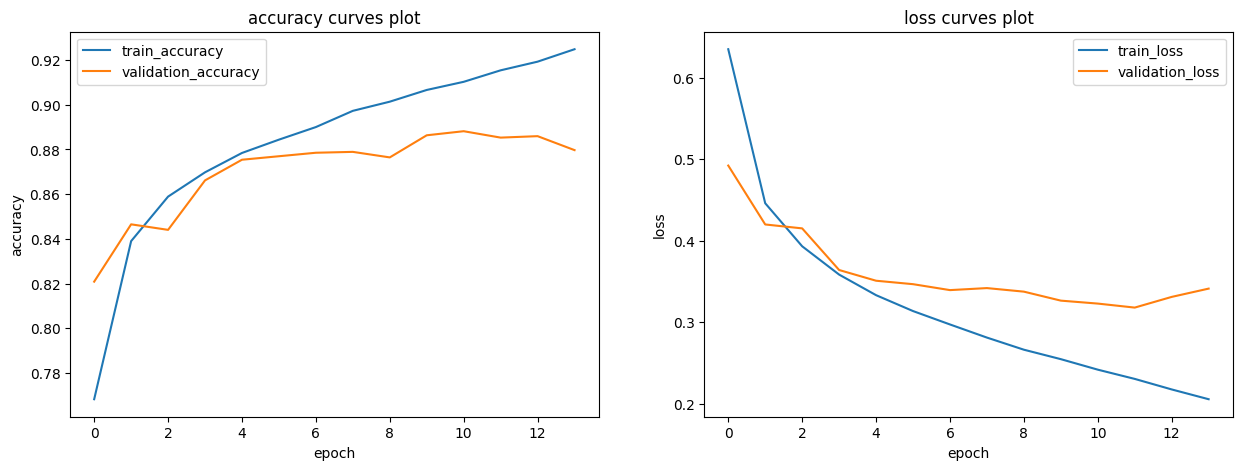

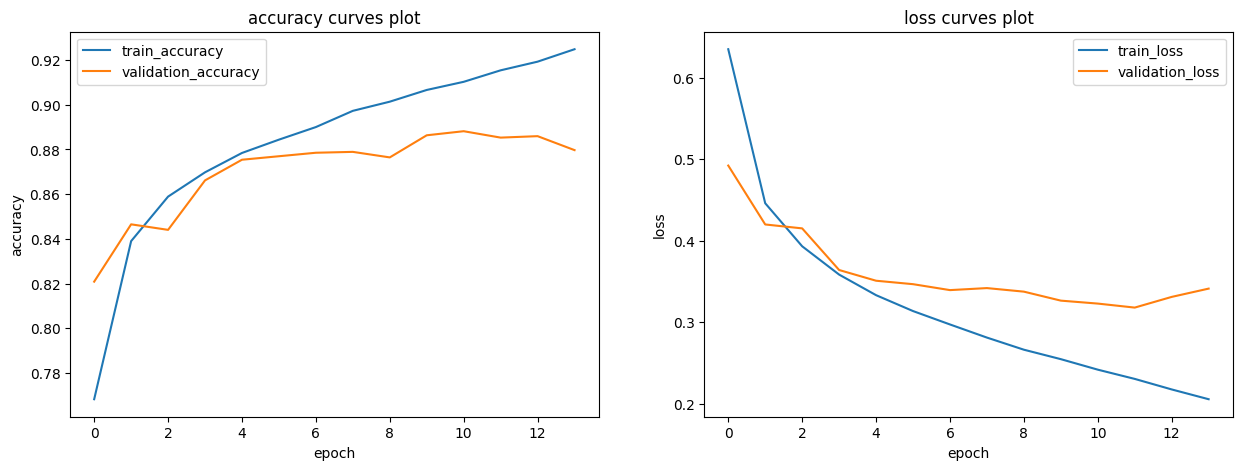

In [41]:
from sklearn.model_selection import KFold

accuracies, losses, histories = k_folds_evaluation(x_train,
                                                   np.array(y_train_encoded),
                                                   batch_size = 60,
                                                   shape = 28, n_folds = 5,
                                                   model = "lenet")

print(f"mean accuracy on test set: {np.array(accuracies).mean()}")
print(f"mean loss on test set: {np.array(losses).mean()}")

accuracies_history = []
for history in histories:
    show_learning_curves(history)

Now I will traini a MLP to compare it with the CNN algorithm.

Epoch 1/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6984 - loss: 0.8049 - val_accuracy: 0.8153 - val_loss: 0.5111
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8427 - loss: 0.4447 - val_accuracy: 0.8524 - val_loss: 0.4339
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8599 - loss: 0.3872 - val_accuracy: 0.8553 - val_loss: 0.4203
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8706 - loss: 0.3579 - val_accuracy: 0.8707 - val_loss: 0.3683
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8804 - loss: 0.3364 - val_accuracy: 0.8587 - val_loss: 0.3834
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8827 - loss: 0.3179 - val_accuracy: 0.8791 - val_loss: 0.3395
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8924 - loss: 0.2920 - val_accuracy: 0.8715 - val_loss: 0.3490
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8996 - loss: 0.2759 - val_accu

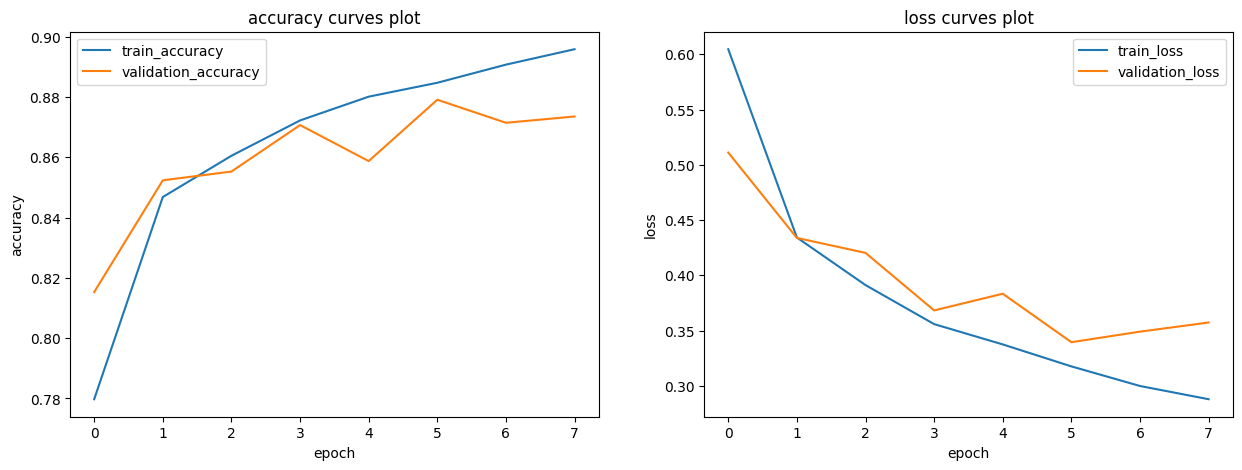

In [42]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2)]
x_train_mlp = x_train.reshape(x_train.shape[0], -1)/512
history, model = fit_mlp(x_train_mlp, np.array(y_train_encoded), callbacks, batch_size = 60)

show_learning_curves(history)

In [43]:
x_test_mlp = x_test.reshape(x_test.shape[0], -1)/512

test loss: 0.3558254539966583, test accuracy: 0.8745833039283752
training loss: 0.3054523468017578, training accuracy: 0.8913333415985107


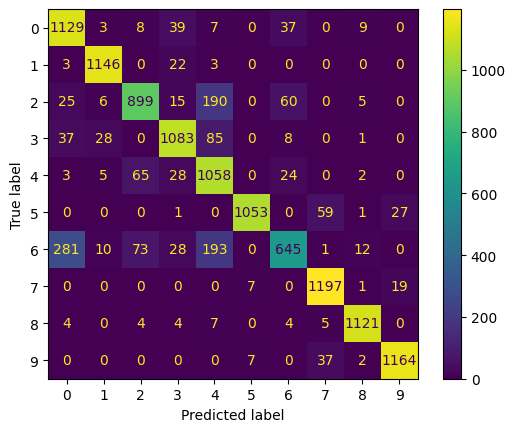

In [44]:
model_metrics(model, x_test_mlp, x_train_mlp)

As expected, the results are not better than the convolutional neural networks, but it is still comparable.

Now it is time to improve the hyperparameters for the convolutional neural networks, I will not be doing this blindly but I will do this by following the Alexnet architecture which is an improvement of the lenet-5.

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



640/640 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.6713 - loss: 0.8813 - val_accuracy: 0.8438 - val_loss: 0.4225
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8635 - loss: 0.3648 - val_accuracy: 0.8835 - val_loss: 0.3165
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8938 - loss: 0.2879 - val_accuracy: 0.8855 - val_loss: 0.3255
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9054 - loss: 0.2531 - val_accuracy: 0.9001 - val_loss: 0.2690
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9157 - loss: 0.2260 - val_accuracy: 0.9056 - val_loss: 0.2689
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9264 - loss: 0.1996 - val_accuracy: 0.9057 - val_loss: 0.2574
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9328 - loss: 0.1790 - val_accuracy: 0.9109 - val_loss: 0.2562
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9411 - loss: 0.1555 - val_

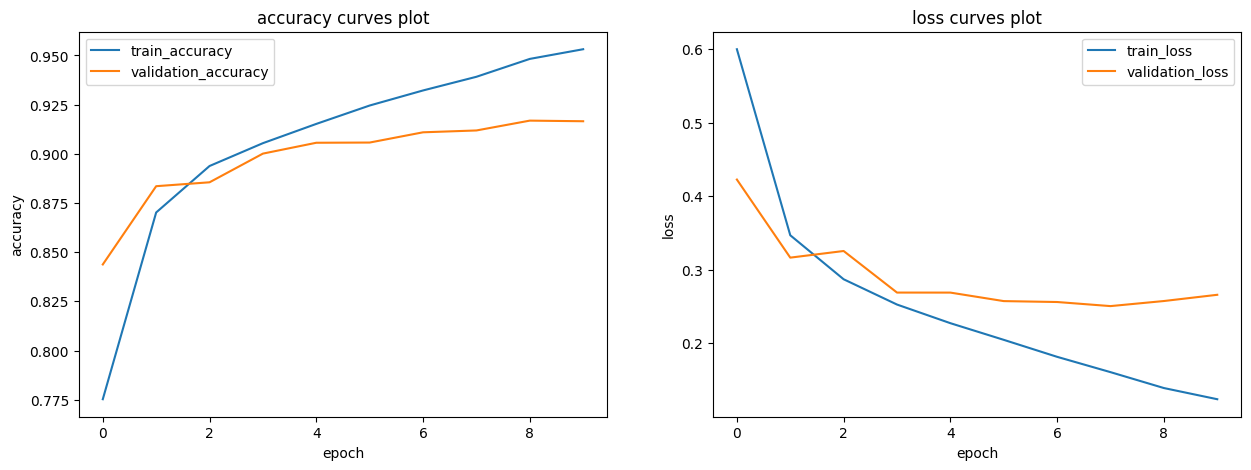

In [45]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2)]
history, model = fit_lenet_new(x_train, np.array(y_train_encoded), callbacks, batch_size = 60, shape = 28)

show_learning_curves(history)

test loss: 0.2629856765270233, test accuracy: 0.9171666502952576
training loss: 0.1238097995519638, training accuracy: 0.9582916498184204


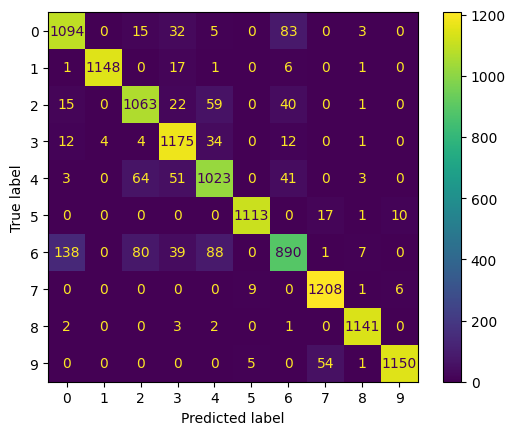

In [46]:
model_metrics(model, x_test/255, x_train/255)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



640/640 ━━━━━━━━━━━━━━━━━━━━ 57s 69ms/step - accuracy: 0.6588 - loss: 0.9484 - val_accuracy: 0.8610 - val_loss: 0.3750
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.8692 - loss: 0.3491 - val_accuracy: 0.8770 - val_loss: 0.3322
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.8853 - loss: 0.3094 - val_accuracy: 0.8928 - val_loss: 0.2872
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9044 - loss: 0.2580 - val_accuracy: 0.8988 - val_loss: 0.2803
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9108 - loss: 0.2384 - val_accuracy: 0.8991 - val_loss: 0.2830
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - accuracy: 0.9199 - loss: 0.2135 - val_accuracy: 0.8959 - val_loss: 0.2950


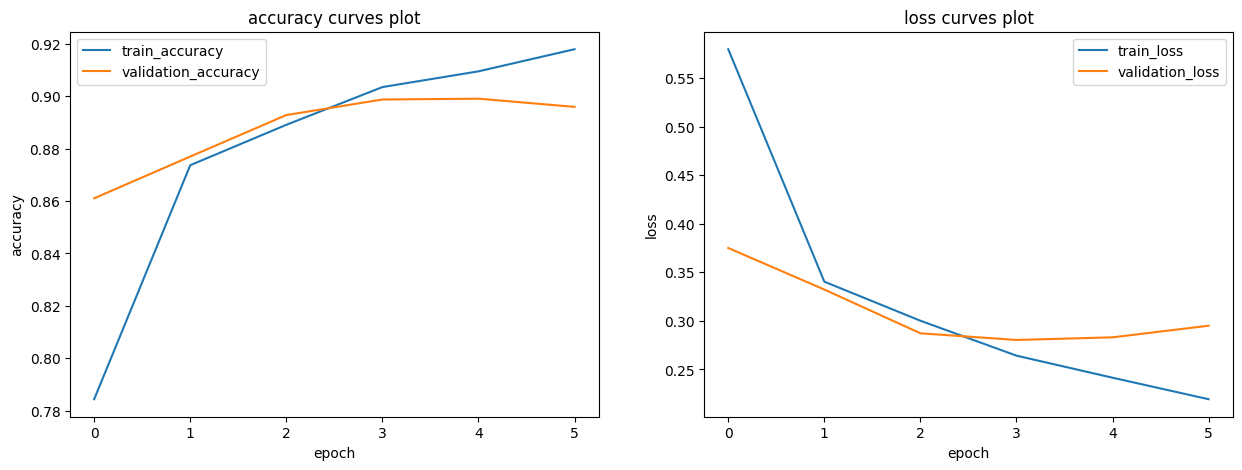

In [49]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2)]
history, model = fit_alexnet(x_train, np.array(y_train_encoded), callbacks, batch_size = 60, shape = 28)

show_learning_curves(history)

test loss: 0.2842898964881897, test accuracy: 0.8979166746139526
training loss: 0.2141522914171219, training accuracy: 0.9181874990463257


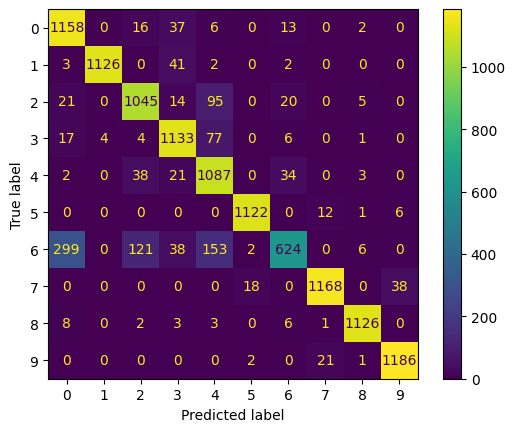

In [50]:
model_metrics(model, x_test/255, x_train/255)

It is obvious that the accuracy is slightly better, note that I needed to upscale the input images to the network, otherwise it will give an error because maxpooling will derease the image dimensions throughtout the networrk.

Now it is time to do transfer learning, but networks like VGG 16 and 19 and etc are expecting 200 * 200 images and also RGB which means they have 3 channels, i will scale the image first then I will make a regular conv layer witht same padding but with 3 channels at the beginning. I will then add some layers to the model so thsat it can learn the output classes.

In [38]:
def vgg_16(shape = (200, 200, 3)):
    
    base_model = tf.keras.applications.VGG16(input_shape=shape,
                                                  include_top=False,
                                                  weights="imagenet")

    model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (200, 200))),
      tf.keras.layers.Conv2D(3, kernel_size=1, padding="same", activation = 'relu'),
      base_model,
      tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(120, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return model


def vgg_19(shape = (200, 200, 3)):
    
    base_model = tf.keras.applications.VGG19(input_shape=shape,
                                                  include_top=False,
                                                  weights="imagenet")

    model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (200, 200))),
      tf.keras.layers.Conv2D(3, kernel_size=1, padding="same", activation = 'relu'),
      base_model,
      tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(120, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return model


def fit_vgg(data, label, callbacks, batch_size, type_model, verbose = 1):
    
    if type_model == "16":
        model = vgg_16()
    else:
        model = vgg_19()
        
    model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
    datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

    with tf.device('/device:GPU:0'):
        datagen.fit(data)

        train_generator = datagen.flow(data, label, batch_size= batch_size, subset='training')
        validation_generator = datagen.flow(data, label, batch_size = batch_size, subset='validation')

        history = model.fit(train_generator,
                          epochs=100,
                          validation_data=validation_generator, callbacks = [callbacks],
                          verbose = verbose)
    
    return history, model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



640/640 ━━━━━━━━━━━━━━━━━━━━ 505s 669ms/step - accuracy: 0.4940 - loss: 1.3712 - val_accuracy: 0.8433 - val_loss: 0.4333
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 426s 665ms/step - accuracy: 0.8447 - loss: 0.4229 - val_accuracy: 0.8543 - val_loss: 0.3985
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 423s 660ms/step - accuracy: 0.8721 - loss: 0.3423 - val_accuracy: 0.8780 - val_loss: 0.3385
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 420s 657ms/step - accuracy: 0.8917 - loss: 0.2941 - val_accuracy: 0.8921 - val_loss: 0.3016
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 420s 657ms/step - accuracy: 0.9006 - loss: 0.2599 - val_accuracy: 0.8945 - val_loss: 0.2827
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 420s 657ms/step - accuracy: 0.9032 - loss: 0.2535 - val_accuracy: 0.8965 - val_loss: 0.2977
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 420s 656ms/step - accuracy: 0.9171 - loss: 0.2293 - val_accuracy: 0.9036 - val_loss: 0.2686
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 420s 656ms/step - accuracy: 0.9257 - los

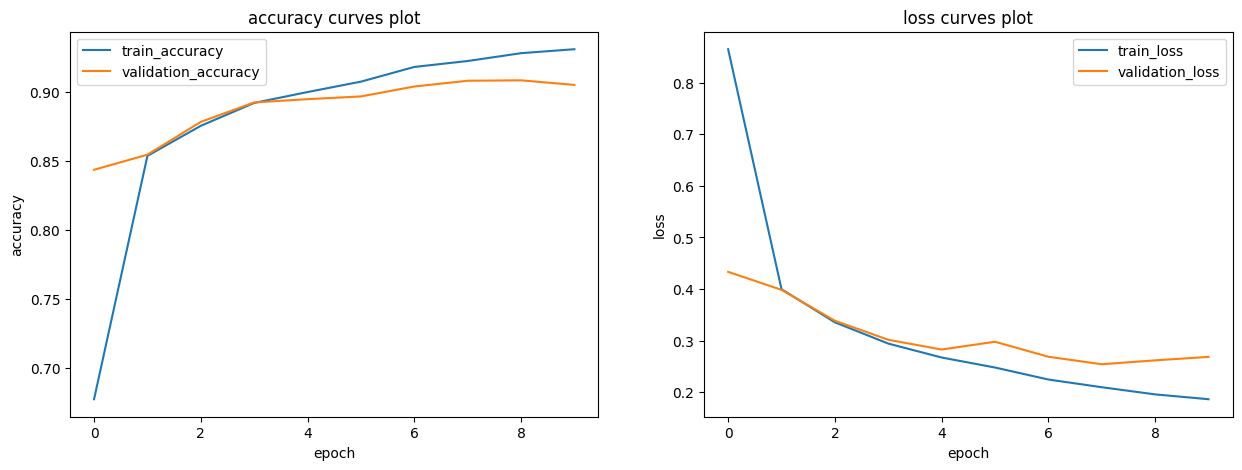

In [48]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2)]
history, model = fit_vgg(x_train, np.array(y_train_encoded), callbacks, batch_size = 60, type_model = "16")

show_learning_curves(history)

test loss: 0.26506540179252625, test accuracy: 0.9072499871253967
training loss: 0.18926972150802612, training accuracy: 0.9305624961853027


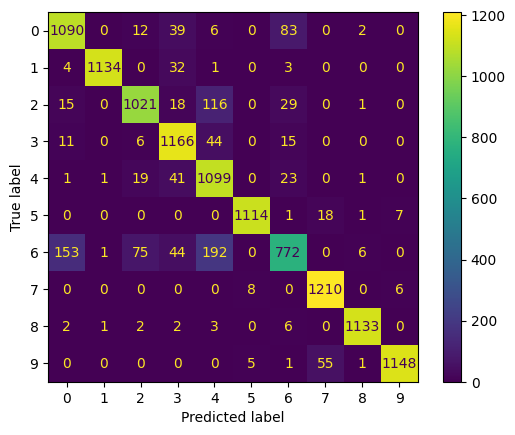

In [49]:
model_metrics(model, x_test/255, x_train/255)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

I0000 00:00:1712943553.934281      89 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712943553.961838      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


609/640 ━━━━━━━━━━━━━━━━━━━━ 22s 715ms/step - accuracy: 0.5259 - loss: 1.7636

W0000 00:00:1712944056.445844      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.5347 - loss: 1.7207

W0000 00:00:1712944079.505520      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712944154.961377      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


640/640 ━━━━━━━━━━━━━━━━━━━━ 720s 940ms/step - accuracy: 0.5350 - loss: 1.7193 - val_accuracy: 0.8444 - val_loss: 0.4291
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 492s 769ms/step - accuracy: 0.8423 - loss: 0.4211 - val_accuracy: 0.8444 - val_loss: 0.4107
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 490s 766ms/step - accuracy: 0.8612 - loss: 0.3715 - val_accuracy: 0.8659 - val_loss: 0.3566
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 490s 765ms/step - accuracy: 0.8766 - loss: 0.3287 - val_accuracy: 0.8774 - val_loss: 0.3406
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 489s 764ms/step - accuracy: 0.8841 - loss: 0.3129 - val_accuracy: 0.8925 - val_loss: 0.2932
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 501s 763ms/step - accuracy: 0.8944 - loss: 0.2791 - val_accuracy: 0.8903 - val_loss: 0.2984
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 487s 761ms/step - accuracy: 0.8936 - loss: 0.2680 - val_accuracy: 0.8940 - val_loss: 0.2889
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 487s 761ms/step - accuracy: 0.9031 - los

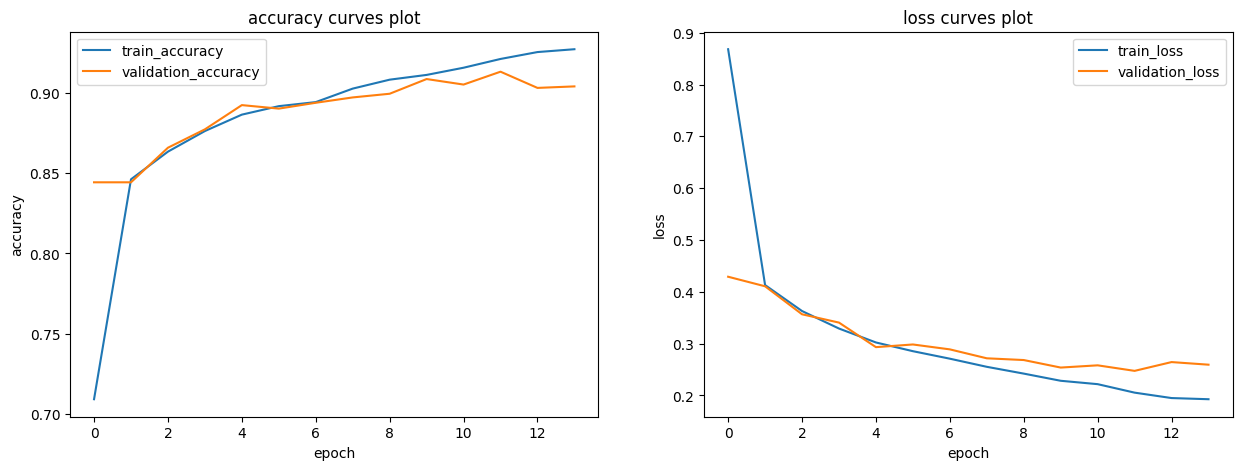

In [39]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2)]
history, model = fit_vgg(x_train, np.array(y_train_encoded), callbacks, batch_size = 60, type_model = "19")

show_learning_curves(history)

W0000 00:00:1712950511.863542      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712950580.313688      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712950843.420047      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


test loss: 0.26821818947792053, test accuracy: 0.9001834392547607
training loss: 0.189303919672966, training accuracy: 0.9284895062446594


W0000 00:00:1712950844.450841      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712950906.853136      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


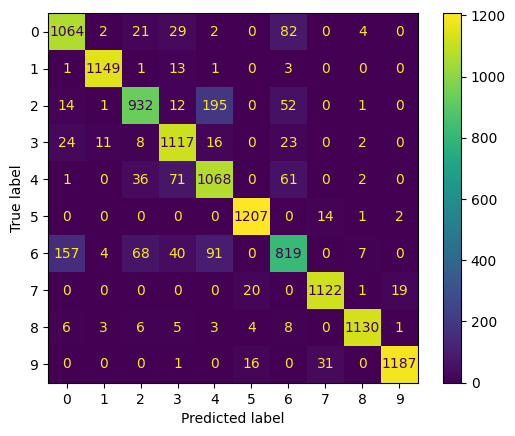

In [40]:
model_metrics(model, x_test/255, x_train/255)

In [41]:
# base_model.trainable = True

# print("Number of layers in the base model: ", len(base_model.layers))

# fine_tune_at = 1

# for layer in base_model.layers[:fine_tune_at]:
#   layer.trainable =  False